In [1]:
# import library
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## **Advertising Dataset**


In [2]:
ad_dataset = pd.read_csv('advertising_dataset.csv')
ad_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='TV', ylabel='Sales'>

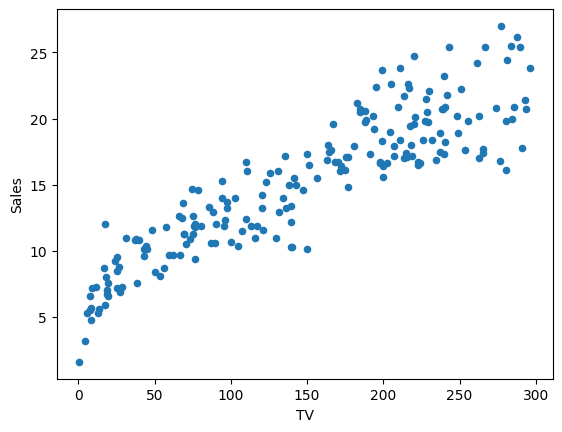

In [3]:
ad_dataset.plot(kind='scatter', x='TV', y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

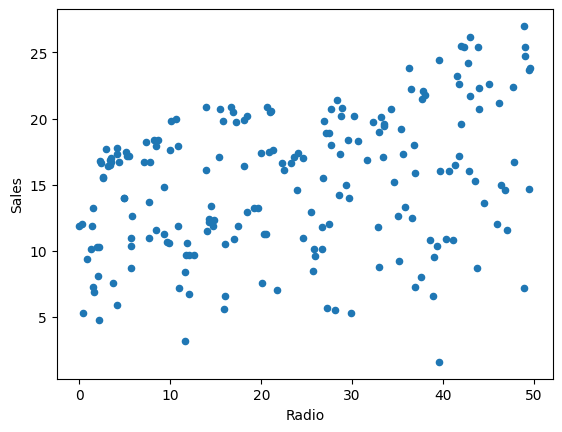

In [4]:
ad_dataset.plot(kind='scatter', x='Radio', y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

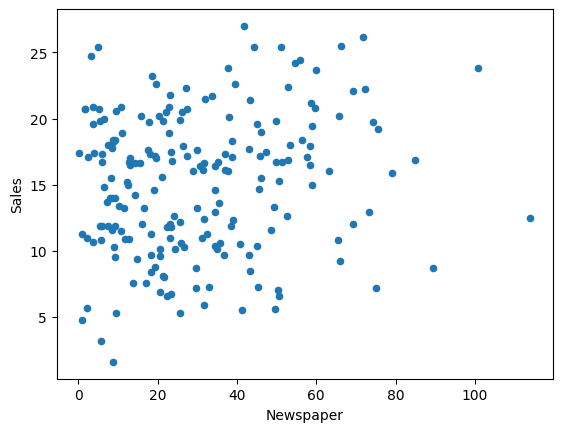

In [5]:
ad_dataset.plot(kind='scatter', x='Newspaper', y='Sales')

In [6]:
# define variable
X = ad_dataset['TV']
x = X.values.reshape(-1, 1) # reshape it to 2D matrix, because scikit-learn only accepts input in the form of 2D matrices
y = ad_dataset['Sales']

In [7]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# model initialization
tv_model = LinearRegression()

# train model
tv_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = tv_model.predict(X_test)
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [9]:
mean_squared_error(y_test, y_pred)

6.101072906773963

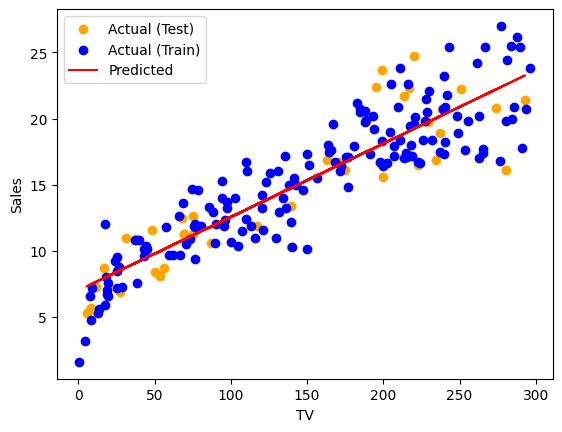

In [10]:
# visualization
def visualize_data(X_train, y_train, X_test, y_test, x_label="", y_label=""):
  plt.scatter(X_test, y_test, color='orange', label='Actual (Test)')
  plt.scatter(X_train, y_train, color='blue', label='Actual (Train)')
  plt.plot(X_test, y_pred, color='red', label='Predicted')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()


visualize_data(X_train, y_train, X_test, y_test, "TV", "Sales")

Repeat the training for Radio and Newspaper

In [11]:
# define variable
X = ad_dataset['Radio']
x = X.values.reshape(-1, 1)
y = ad_dataset['Sales']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# model initialization
radio_model = LinearRegression()
# train model
radio_model.fit(X_train, y_train)

y_pred = radio_model.predict(X_test)

mean_squared_error(y_test, y_pred)

27.595581948583174

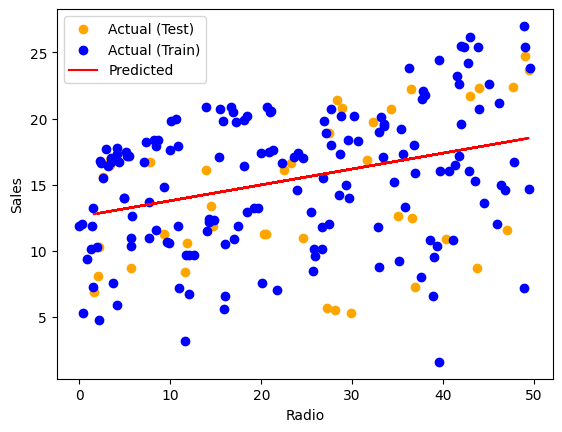

In [12]:
visualize_data(X_train, y_train, X_test, y_test, "Radio", "Sales")

In [13]:
# define variable
X = ad_dataset['Newspaper']
x = X.values.reshape(-1, 1)
y = ad_dataset['Sales']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# model initialization
np_model = LinearRegression()
# train model
np_model.fit(X_train, y_train)

y_pred = np_model.predict(X_test)

mean_squared_error(y_test, y_pred)

30.759376922769615

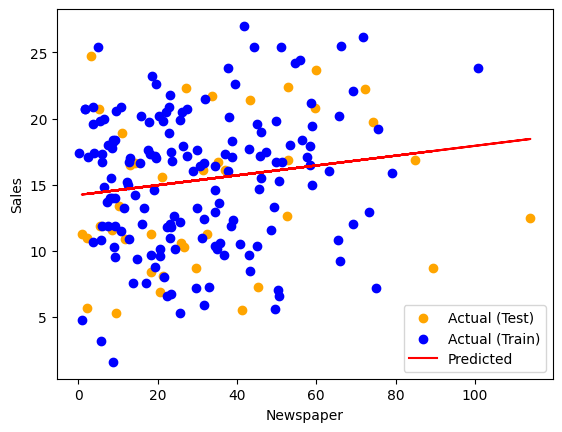

In [14]:
visualize_data(X_train, y_train, X_test, y_test, "Newspaper", "Sales")

### **Try it yourself**:
Use the salary dataset to traing a linear regression model to predict the salary based on years of experiences

In [15]:
# YOUR CODE HERE:

## **2. Multiple Linear Model**

Multiple Linear Regression extends this concept by modelling the relationship between a dependent variable and two or more independent variables. This technique allows us to understand how multiple features collectively affect the outcomes.

#### **Multicollinearity in Multiple Linear Regression**
Multicollinearity arises when two or more independent variables are highly correlated with each other. This can make it difficult to find the individual contribution of each variable to the dependent variable.

To detect multicollinearity we can use:

***Correlation Matrix***: A correlation matrix helps to find relationships between independent variables. High correlations (close to 1 or -1) suggest multicollinearity.

In [16]:
ad_dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


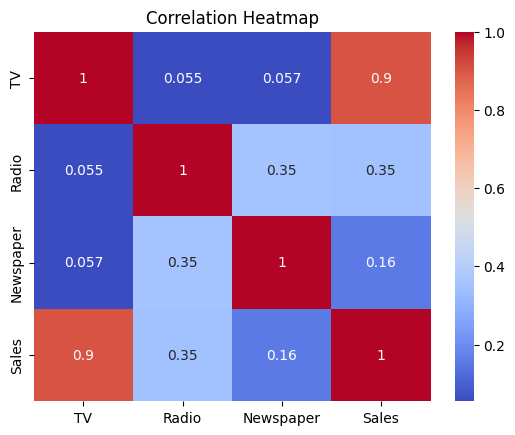

In [17]:
# Visualize the correlation

sns.heatmap(ad_dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# define variable
X = ad_dataset[['Radio', 'TV', 'Newspaper']]
y = ad_dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = mlr_model.predict(X_test)

In [20]:
mean_squared_error(y_test, y_pred)

2.9077569102710896

In [21]:
mlr_model.coef_

array([0.10094536, 0.05450927, 0.00433665])

In [22]:
for x, y in zip(X.columns, mlr_model.coef_):
  print(x,y)

Radio 0.10094536239295579
TV 0.05450927083721974
Newspaper 0.004336646822034024
